In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_excel("Monthwise_SPLH_Consolidated_File.xlsx")
df

,Month,From,To,Transactions,Sales,Hours,SPLH,CPLH,Labour Cost,Labour %
0,April,04:00:00,05:00:00,0,0.00,6.75,0.00,0.00,108.14,0.00
1,April,05:00:00,06:00:00,34,86.38,30.50,2.83,1.11,492.14,569.74
2,April,06:00:00,07:00:00,2811,7960.35,76.83,103.61,36.59,1203.86,15.12
3,April,07:00:00,08:00:00,3102,9707.61,102.02,95.15,30.41,1607.45,16.56
4,April,08:00:00,09:00:00,3156,10237.74,105.18,97.34,30.00,1659.24,16.21
...,...,...,...,...,...,...,...,...,...,...
211,September,17:00:00,18:00:00,770,2777.90,53.18,52.24,14.48,762.00,27.43
212,September,18:00:00,19:00:00,505,1836.45,29.75,61.73,16.97,429.73,23.40
213,September,19:00:00,20:00:00,293,1050.49,30.00,35.02,9.77,433.48,41.26
214,September,20:00:00,21:00:00,172,533.51,30.00,17.78,5.73,433.48,81.25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         216 non-null    object 
 1   From          216 non-null    object 
 2   To            216 non-null    object 
 3   Transactions  216 non-null    int64  
 4   Sales         216 non-null    float64
 5   Hours         216 non-null    float64
 6   SPLH          216 non-null    float64
 7   CPLH          216 non-null    float64
 8   Labour Cost   216 non-null    float64
 9   Labour %      216 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 17.0+ KB


In [ ]:
df['Hour'] = pd.to_datetime(df['From']).dt.hour

C:\Users\kokul\AppData\Local\Temp\ipykernel_18820\2258057971.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['From']).dt.hour


#### **Time-based features**

In [6]:
df['Is_Peak_Hour'] = df['Hour'].apply(lambda x: 1 if 7 <= x <= 9 or 11 <= x <= 13 else 0)
df['Day_Part'] = df['Hour'].apply(lambda x: 0 if 4 <= x < 11 else (1 if 11 <= x < 16 else (2 if 16 <= x < 22 else 3)))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         216 non-null    object 
 1   From          216 non-null    object 
 2   To            216 non-null    object 
 3   Transactions  216 non-null    int64  
 4   Sales         216 non-null    float64
 5   Hours         216 non-null    float64
 6   SPLH          216 non-null    float64
 7   CPLH          216 non-null    float64
 8   Labour Cost   216 non-null    float64
 9   Labour %      216 non-null    float64
 10  Hour          216 non-null    int32  
 11  Is_Peak_Hour  216 non-null    int64  
 12  Day_Part      216 non-null    int64  
dtypes: float64(6), int32(1), int64(3), object(3)
memory usage: 21.2+ KB


In [17]:
features = ['Hour', 'Transactions', 'Sales', 'SPLH', 'CPLH', 'Is_Peak_Hour', 'Day_Part']

In [10]:
X = df[['Hour', 'Transactions', 'Sales', 'SPLH', 'CPLH','Is_Peak_Hour', 'Day_Part']]
y = df['Hours']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
y_pred = rf_model.predict(X_test)

In [14]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [15]:
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Absolute Error: 3.11
Root Mean Squared Error: 4.55


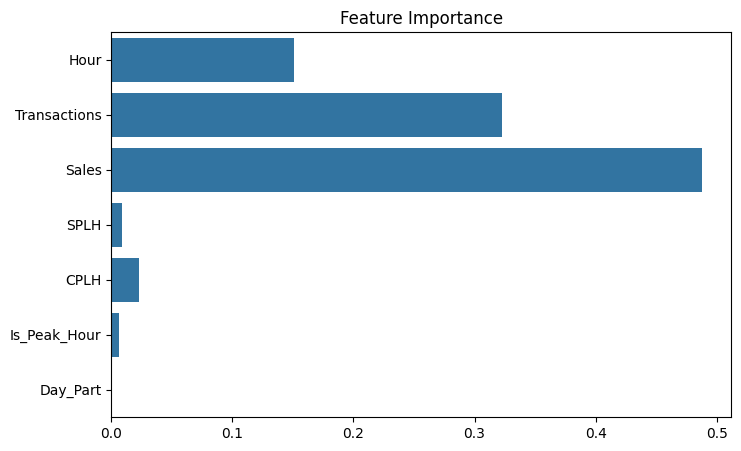

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(x=rf_model.feature_importances_, y=features)
plt.title("Feature Importance")
plt.show()

In [21]:
pip install lightbgm

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement lightbgm (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for lightbgm


In [22]:
import xgboost as xgb
import lightgbm as lgb

ModuleNotFoundError: No module named 'lightgbm'